# <center> <img src="../../labs/img/ITESOLogo.png" alt="ITESO" width="480" height="130"> </center>
# <center> **Departamento de Electrónica, Sistemas e Informática** </center>
---
### <center> **Procesamiento de Datos Masivos** </center>
---
### <center> **Primavera 2025** </center>
---
**Primer Examen**

**Fecha**: 14 de Marzo del 2025

**Nombre del estudiante**: Luis Acosta

**Professor**: Pablo Camarillo Ramirez

In [15]:
import findspark
findspark.init()

In [17]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Mid-term exam: Luis Acosta") \
    .master("spark://7e5fdd448b6d:7077") \
    .config("spark.ui.port","4040") \
    .getOrCreate()
sc = spark.sparkContext

In [21]:
# Load data - Departments

from team_name.spark_utils import SparkUtils

departments_columns = [("department_id", "integer"),("department_name", "string"),("location", "string")]

departments_schema = SparkUtils.generate_schema(departments_columns)

departments_df = spark.read \
                .schema(departments_schema) \
                .option("header", "true") \
                .csv("/home/jovyan/notebooks/data/departments.csv")

departments_df.printSchema()

departments_df.show(5, truncate=False)

root
 |-- department_id: integer (nullable = true)
 |-- department_name: string (nullable = true)
 |-- location: string (nullable = true)

+-------------+----------------------+---------+
|department_id|department_name       |location |
+-------------+----------------------+---------+
|101          |Human Resources       |San Diego|
|102          |Finance and Accounting|New York |
|103          |Sales and Marketing   |Chicago  |
|104          |Data Engineering      |Zapopan  |
|105          |Data Science          |Seattle  |
+-------------+----------------------+---------+
only showing top 5 rows



In [20]:
# Load data - Employees

employees_columns = [("employee_id", "integer"),("employee_info", "string")]

employees_schema = SparkUtils.generate_schema(employees_columns)

employees_df = spark.read \
                .schema(employees_schema) \
                .option("header", "true") \
                .csv("/home/jovyan/notebooks/data/employees.csv")

employees_df.printSchema()

employees_df.show(5, truncate=False)

root
 |-- employee_id: integer (nullable = true)
 |-- employee_info: string (nullable = true)



+-----------+-------------------------------------------------------------------------------------------+
|employee_id|employee_info                                                                              |
+-----------+-------------------------------------------------------------------------------------------+
|1          |{'name': 'Caitlyn', 'department_id': 103, 'salary': 115959.78, 'hire_date': '2002-06-10'}  |
|2          |{'name': 'Rachel', 'department_id': 104, 'salary': 100820.16, 'hire_date': '2009-07-01'}   |
|3          |{'name': 'Carrie', 'department_id': 105, 'salary': 114421.44, 'hire_date': '1998-12-10'}   |
|4          |{'name': 'Renee', 'department_id': 104, 'salary': 54688.13, 'hire_date': '1995-03-17'}     |
|5          |{'name': 'Gabriella', 'department_id': 109, 'salary': 106267.03, 'hire_date': '1995-02-09'}|
+-----------+-------------------------------------------------------------------------------------------+
only showing top 5 rows



In [35]:
# Extract employee information

from pyspark.sql.functions import get_json_object

employees_df = employees_df.withColumn("name", get_json_object(employees_df.employee_info, "$.name"))
employees_df = employees_df.withColumn("department_id", get_json_object(employees_df.employee_info, "$.department_id"))
employees_df = employees_df.withColumn("salary", get_json_object(employees_df.employee_info, "$.salary").cast("double"))
employees_df = employees_df.withColumn("hire_date", get_json_object(employees_df.employee_info, "$.hire_date"))

employees_df.show(5, truncate=False)

+-----------+-------------------------------------------------------------------------------------------+---------+-------------+---------+----------+
|employee_id|employee_info                                                                              |name     |department_id|salary   |hire_date |
+-----------+-------------------------------------------------------------------------------------------+---------+-------------+---------+----------+
|1          |{'name': 'Caitlyn', 'department_id': 103, 'salary': 115959.78, 'hire_date': '2002-06-10'}  |Caitlyn  |103          |115959.78|2002-06-10|
|2          |{'name': 'Rachel', 'department_id': 104, 'salary': 100820.16, 'hire_date': '2009-07-01'}   |Rachel   |104          |100820.16|2009-07-01|
|3          |{'name': 'Carrie', 'department_id': 105, 'salary': 114421.44, 'hire_date': '1998-12-10'}   |Carrie   |105          |114421.44|1998-12-10|
|4          |{'name': 'Renee', 'department_id': 104, 'salary': 54688.13, 'hire_date': '1995-03

In [36]:
# Join Operations

final_df = employees_df.join(departments_df, departments_df.department_id == employees_df.department_id)
final_df.show(5, truncate=False)

+-----------+-------------------------------------------------------------------------------------------+---------+-------------+---------+----------+-------------+-------------------+-------------+
|employee_id|employee_info                                                                              |name     |department_id|salary   |hire_date |department_id|department_name    |location     |
+-----------+-------------------------------------------------------------------------------------------+---------+-------------+---------+----------+-------------+-------------------+-------------+
|1          |{'name': 'Caitlyn', 'department_id': 103, 'salary': 115959.78, 'hire_date': '2002-06-10'}  |Caitlyn  |103          |115959.78|2002-06-10|103          |Sales and Marketing|Chicago      |
|2          |{'name': 'Rachel', 'department_id': 104, 'salary': 100820.16, 'hire_date': '2009-07-01'}   |Rachel   |104          |100820.16|2009-07-01|104          |Data Engineering   |Zapopan      |
|3   

In [37]:
# Transformations

from pyspark.sql.functions import when

final_df = final_df.withColumn("salary_category", when(final_df["salary"] >= 55000, "High").otherwise("Low"))
final_df.show(5, truncate=False)

+-----------+-------------------------------------------------------------------------------------------+---------+-------------+---------+----------+-------------+-------------------+-------------+---------------+
|employee_id|employee_info                                                                              |name     |department_id|salary   |hire_date |department_id|department_name    |location     |salary_category|
+-----------+-------------------------------------------------------------------------------------------+---------+-------------+---------+----------+-------------+-------------------+-------------+---------------+
|1          |{'name': 'Caitlyn', 'department_id': 103, 'salary': 115959.78, 'hire_date': '2002-06-10'}  |Caitlyn  |103          |115959.78|2002-06-10|103          |Sales and Marketing|Chicago      |High           |
|2          |{'name': 'Rachel', 'department_id': 104, 'salary': 100820.16, 'hire_date': '2009-07-01'}   |Rachel   |104          |100820.16|2

In [38]:
# Filter and Group - filter

high_df = final_df.filter(final_df["salary_category"] == "High")
low_df = final_df.filter(final_df["salary_category"] == "Low")

high_df.show(5, truncate=False)
low_df.show(5, truncate=False)

+-----------+-------------------------------------------------------------------------------------------+---------+-------------+---------+----------+-------------+-------------------+-------------+---------------+
|employee_id|employee_info                                                                              |name     |department_id|salary   |hire_date |department_id|department_name    |location     |salary_category|
+-----------+-------------------------------------------------------------------------------------------+---------+-------------+---------+----------+-------------+-------------------+-------------+---------------+
|1          |{'name': 'Caitlyn', 'department_id': 103, 'salary': 115959.78, 'hire_date': '2002-06-10'}  |Caitlyn  |103          |115959.78|2002-06-10|103          |Sales and Marketing|Chicago      |High           |
|2          |{'name': 'Rachel', 'department_id': 104, 'salary': 100820.16, 'hire_date': '2009-07-01'}   |Rachel   |104          |100820.16|2

In [44]:
# Filter and Group - group

high_df.createOrReplaceTempView("high_df")
low_df.createOrReplaceTempView("low_df")

high_avg_df = spark.sql("SELECT department_name, AVG(salary) AS avg_salary FROM high_df GROUP BY department_name")
low_avg_df = spark.sql("SELECT department_name, AVG(salary) AS avg_salary FROM low_df GROUP BY department_name")

high_avg_df.show(5)
low_avg_df.show(5)

+--------------------+------------------+
|     department_name|        avg_salary|
+--------------------+------------------+
|Corporate Strateg...|102741.38324414717|
| Sales and Marketing|100839.65275449108|
|    Data Engineering|101626.29492163012|
|Research and Deve...|  98714.3003086419|
|Finance and Accou...|100731.07877887784|
+--------------------+------------------+
only showing top 5 rows

+--------------------+------------------+
|     department_name|        avg_salary|
+--------------------+------------------+
|Corporate Strateg...|41590.741833333326|
| Sales and Marketing| 41150.40277777778|
|    Data Engineering| 41358.50794117647|
|Finance and Accou...|42740.952888888874|
|Research and Deve...| 41426.43521126761|
+--------------------+------------------+
only showing top 5 rows



In [46]:
# Sort

spark.sql("SELECT name, salary FROM high_df ORDER BY salary DESC LIMIT 5").show()
spark.sql("SELECT name, salary FROM low_df ORDER BY salary DESC LIMIT 5").show()

+---------+---------+
|     name|   salary|
+---------+---------+
|Gabriella|149989.73|
|Katherine| 149979.3|
|     Ryan| 149963.1|
|  Caitlyn|149956.54|
|     Mark|149915.56|
+---------+---------+

+-----+--------+
| name|  salary|
+-----+--------+
|Linda|54993.53|
|Tammy|54991.71|
|Aaron|54989.45|
|Craig| 54945.2|
|Aaron| 54937.3|
+-----+--------+



In [62]:
# Find the numbe of employees with more years in the company

from pyspark.sql.functions import year, current_date

final_df = final_df.withColumn("years", year(current_date()) - year(final_df["hire_date"]))

final_df.createOrReplaceTempView("final_df")
spark.sql("SELECT years FROM final_df GROUP BY years ORDER BY years DESC").show(1)

years_df = final_df.filter(final_df.years == 37)
years_df.count()


+-----+
|years|
+-----+
|   37|
+-----+
only showing top 1 row



88

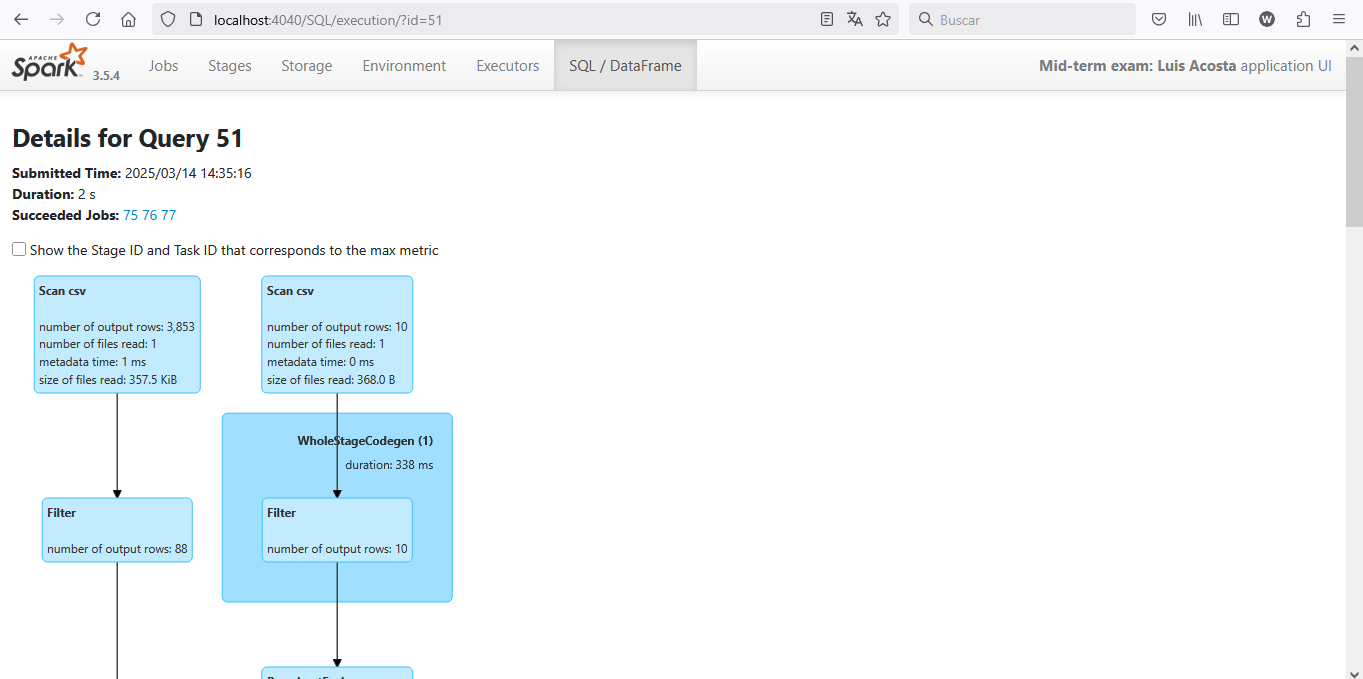